# Figures 1 and 2 - example snapshots and functions
Anna Mackie, 2022

Produces:
- Figure 1, daily snapshot colour maps of longwave (right column) and shortwave (middle column) cloud radiative effect and vertical velocity (left column) at 500 hPa, using SAM_CRM_large300 as an example

- Figure 2, longwave (a) and shortwave (b) cloud radiative effect and area probability distribution (c) of SAM_CRM_large300. Also difference in area probability distribution (dA) between SAM_CRM_large305 and SAM_CRM_large300 (d)

In [7]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
from scipy import stats
from scipy.interpolate import UnivariateSpline
import sys
sys.path.append('../')
import funcs
mpl.rcParams['font.size'] = 16

models = ['CM1',  'dam','ICON_LEM_CRM', 'ICON_NWP_CRM', 'MESONH', 'SAM_CRM', 'SCALE', 'UCLA-CRM',
          'UKMOi-vn11.0-CASIM', 'UKMOi-vn11.0-RA1-T', 'UKMOi-vn11.0-RA1-T-nocloud', 'WRF_COL_CRM']
m = len(models)

day = 0

# limits of vertical velocity, common across models
pl = 0.22 # pos limit
nlim= -0.07 # neg limit
bs = 0.001 # bin size

bins = np.arange(nlim, pl, bs) #creates bins
b = len(bins)
print('no of vertical velocity bins: ', b)
mnbin = [] # create array of the mid-point between bin limits for plotting
for i in range(1,b):
    mnbin = np.append(mnbin, np.mean([bins[i-1], bins[i]])*100)

pLev = 500
lets = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)' 'j)' 'k)', 'l)']    

no of vertical velocity bins:  291


In [2]:
def calcIQR(arr, axis = 0):
    q75, q25 = np.nanpercentile(arr, [75 ,25], axis = axis)
    return q75, q25

def calcRange(arr, axis = 0):
    mn, mx = np.nanmin(arr, axis = axis), np.nanmax(arr, axis = axis)
    return mn, mx

# Figure 1

Using just SAM_CRM_large300, take five individual days and plot 'snapshots' of the vertical velcocity and cloud radiative effect fields

0.6996643031015992 -1.5805288450792432
8.46029503736645 -2.326823666226119
11.126675351988524 -2.366152103058994
3.717207652516663 -2.1279453299939632
0.4555929801426828 -1.585216331295669


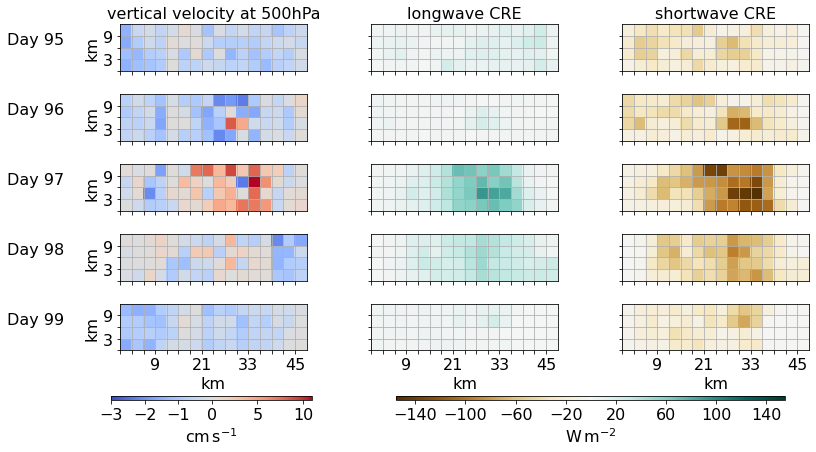

In [9]:
from matplotlib import colors
model = 'SAM_CRM'
temp = 'large300'

# SAM_CRM has dimensions x= 16, y = 4
nn = 16 
mn = 4
d = [20, 21, 22, 23, 24] # corresponds to days 95-99 inclusive
#d = [0,5,10,15,20]

#set up figure
fig2, axes2 = plt.subplots(5,3)
yticks = np.arange(0, mn, 1)
yticklabs = ['', 1*3 ,'',3*3]
xticks = np.arange(0,nn, 1) 

xticklabs = ['', '', '', 3*3, '', '', '', 7*3 , '', '','',
             11*3, '', '', '', 15*3]


divnorm=colors.TwoSlopeNorm(vmin=-3., vcenter=0., vmax=11.)
# load data
dp = '/home/users/arm33/RCEMIP/'+ model +'/processed/DirectFeedbacks/full/'
dp2 = '/home/users/arm33/RCEMIP/'+ model +'/processed/DirectFeedbacks/3D/'
Rlw = np.load(dp + temp + 'lwcrf24hrs.npy', allow_pickle  = True)
Rsw = np.load(dp + temp + 'swcrf24hrs.npy', allow_pickle  = True)
pa = np.load(dp2 + temp + 'pa_profile_25d.npy', allow_pickle = True)/100
wa = np.load(dp2 + temp + 'wa_profile_25d.npy', allow_pickle = True)
wa500 = funcs.getPlevel(wa, pa, pLev)   # find vertical velcoity at levels closest to 500 hPa

for i in range(len(d)):
    #LW 
    axes2[i,1].set_aspect('equal')
    #CS1 = axes2[i,1].contourf(range(n), range(4), Rlw[d[i],:,:n], levels = np.arange(-155, 157, 2), cmap = 'BrBG')
    CS1 = axes2[i,1].pcolor( Rlw[d[i],:,:nn], vmin = -155, vmax = 155, cmap = 'BrBG')
    if i ==0:
        cbaxes1 = fig2.add_axes([0.46, 0.01, 0.3, 0.01]) 
        cb1 = plt.colorbar(CS1, cax = cbaxes1, orientation = 'horizontal' ,ticks = np.arange(-140, 142, 40))  
        cb1.ax.set_xlabel('W$\,$m$^{-2}$')
        axes2[i,1].set_title('longwave CRE', fontsize = 16)
        
    axes2[i,1].text(-0.3, 0.5, 'Day ' + str(d[i]+75) , verticalalignment='bottom', horizontalalignment='right',
                    transform=axes2[i,0].transAxes)
    axes2[i,1].set_xticks(xticks)
    axes2[i,0].set_ylabel('km')
    if i==4:
        axes2[i,1].set_xticklabels(xticklabs)
        axes2[i,1].set_xlabel('km')
    else:
        axes2[i,1].set_xticklabels([])
    axes2[i,1].set_yticks(yticks)
    axes2[i,1].set_yticklabels([])
    axes2[i,1].xaxis.grid(True, zorder=0)
    axes2[i,1].yaxis.grid(True, zorder=0)
    
    
    #sw
    axes2[i,2].set_aspect('equal')
    CS2 = axes2[i,2].pcolor(Rsw[d[i],:,:nn], vmin = -155, vmax = 155, cmap =  'BrBG')
    
    
    if i ==0:
        axes2[i,2].set_title('shortwave CRE', fontsize = 16)
    
    axes2[i,2].set_xticks(xticks)
    if i==4:
        axes2[i,2].set_xticklabels(xticklabs)
        axes2[i,2].set_xlabel('km')
    else:
        axes2[i,2].set_xticklabels([])
    axes2[i,2].set_yticks(yticks)
    axes2[i,2].set_yticklabels([])
    
    axes2[i,2].xaxis.grid(True, zorder=0)
    axes2[i,2].yaxis.grid(True, zorder=0)
    
    #vert velocity
    axes2[i,0].set_aspect('equal')
    CS3 = axes2[i,0].pcolor(wa500[d[i],:,:nn]*100, cmap = 'coolwarm', norm = divnorm)
    print(np.max(wa500[d[i], :,:nn]*100),np.min(wa500[d[i], :,:nn]*100))
    if i ==0:
        cbaxes3 = fig2.add_axes([0.24, 0.01, 0.155, 0.01])#[0.64, 0.1, 0.01, 0.8]) 
        #cbaxes3 = fig2.add_axes([0.7, 0.1, 0.3, 0.01]) 
        cb3 = plt.colorbar(CS3, cax = cbaxes3,orientation = 'horizontal',ticks= [-3, -2, -1, 0, 5, 10]) 
        cb3.ax.set_xlabel('cm$\,$s$^{-1}$')
        #plt.colorbar()
        axes2[i,0].set_title('vertical velocity at 500hPa', fontsize = 16)
    axes2[i,0].set_xticks(xticks)
    if i==4:
        axes2[i,0].set_xticklabels(xticklabs)
        axes2[i,0].set_xlabel('km')
    else:
        axes2[i,0].set_xticklabels([])
    axes2[i,0].set_yticks(yticks)
    axes2[i,0].set_yticklabels(yticklabs)
    axes2[i,0].xaxis.grid(True, zorder=0)
    axes2[i,0].yaxis.grid(True, zorder=0)
    
    
plt.subplots_adjust(hspace = 0.5, wspace = -0.5)
fig2.set_size_inches(18,6)
fig2.savefig('paperplots/Fig1.pdf', bbox_inches = 'tight')

                        


# Figure 2

Looping through models, this section produces the R(w) and A(w) functions described in the paper. These are added to empty arrays to calculate the mean and interquartile range in Figure 2

## Note on method of R(w) and A(w) calculation
Please see Methods section for more detail. Approach is to 
1. load 3D (level, x, y) pressure and vertical velocity fields
2. find, at each grid point (x, y), the level which is closest to 500 hPa in the pressure field
3. use this (level, x, y) to extract vertical velocity at ~ 500 hPa
4. sort vertical velocity at 500 hPa into vertical velocity 'bins' using np.digitize
5. take mean of longwave and shortwave CRE of gridpoints within each vertical velocity 'bin' to create R(w) functions
6. take proportion of gridpoints within each vertical velocity 'bin' to create A(w) function.


In [4]:
# using the lower temperature difference 
temp = 'large295'
temp2 = 'large300'

#create empty arrays for LW, SW and A functions of all the models
LW_arr, SW_arr, A_arr, dA_arr, net_arr = np.empty((m, len(mnbin))),np.empty((m, len(mnbin))),np.empty((m, len(mnbin))),np.empty((m, len(mnbin))),np.empty((m, len(mnbin)))


for k in range(m):
    model = models[k]
    print(model)
    dp = '/home/users/arm33/RCEMIP/'+ model +'/processed_new/3D/'
    dp3 ='/home/users/arm33/RCEMIP/'+ model +'/processed_new/2D/'
    
    # temp 1    
    pa = np.load(dp + temp + 'pa_profile_25d.npy', allow_pickle = True)/100
    wa = np.load(dp + temp + 'wa_profile_25d.npy', allow_pickle = True)
    wa500 = funcs.getPlevel(wa, pa, pLev)             

    lwcrf1 = np.load(dp3  + temp + 'lwcrf24hrs.npy', allow_pickle = True)
    swcrf1 =  np.load(dp3 + temp + 'swcrf24hrs.npy', allow_pickle = True)
    
    dig1 = np.digitize(wa500, bins)
    A1 = funcs.createA(dig1, b)
    LW1 = funcs.createR(lwcrf1, dig1, b)
    LW1 = funcs.rpTrailingZeros(A1, LW1)
    SW1 = funcs.createR(swcrf1, dig1, b)
    SW1 = funcs.rpTrailingZeros(A1, SW1)

    net1 = LW1 + SW1
    
    # temp 2
    pa = np.load(dp + temp2 + 'pa_profile_25d.npy', allow_pickle = True)/100
    wa = np.load(dp + temp2 + 'wa_profile_25d.npy', allow_pickle = True)
    wa500 = funcs.getPlevel(wa, pa, pLev)             
    
    dig1 = np.digitize(wa500, bins)
    A2 = funcs.createA(dig1, b)    
    
    # calculate dA
    dA = A2 - A1
    
    LW_arr[k,] = LW1
    SW_arr[k,] = SW1
    A_arr[k,] = A1
    dA_arr[k,] = dA
    net_arr[k,] = net1


CM1


/home/users/arm33/RCEMIP/allMod/../funcs.py:120: RuntimeWarning: Mean of empty slice
  arrbin = [np.nanmean(arr[dig==i]) for i in range(1,b)]


dam
ICON_LEM_CRM
ICON_NWP_CRM
MESONH
SAM_CRM
SCALE
UCLA-CRM
UKMOi-vn11.0-CASIM
UKMOi-vn11.0-RA1-T
UKMOi-vn11.0-RA1-T-nocloud
WRF_COL_CRM


/opt/jaspy/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/tmp/ipykernel_524/2593055694.py:6: RuntimeWarning: All-NaN slice encountered
  mn, mx = np.nanmin(arr, axis = axis), np.nanmax(arr, axis = axis)
/tmp/ipykernel_524/3678199558.py:62: RuntimeWarning: Mean of empty slice
  axes[0].plot(mnbin, np.nanmean(LW_arr, axis = 0), 'k-')
/tmp/ipykernel_524/3678199558.py:70: RuntimeWarning: Mean of empty slice
  axes[1].plot(mnbin, np.nanmean(SW_arr, axis = 0), 'k-')


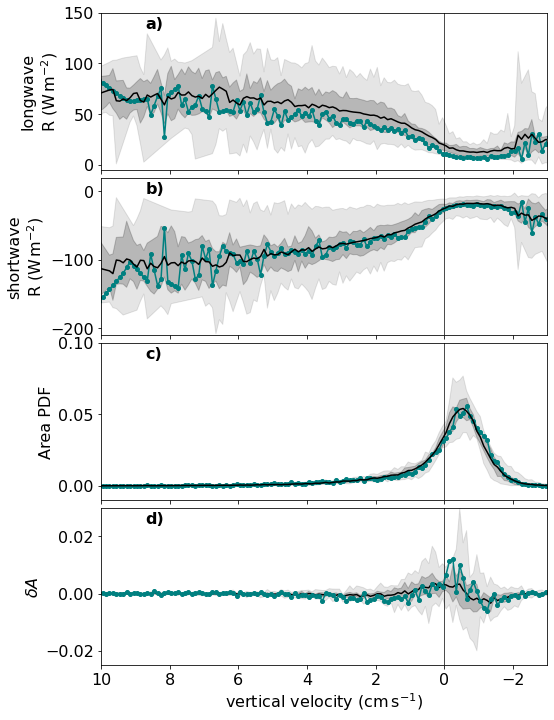

In [10]:
# plot figure: light shading for full range, light shading interquartile range, solid black line for mean 
# and teal line for example model SAM_CRM

fig, axes = plt.subplots(4,1)
xlim = [10, -3]

deltaT = 5 # temperature difference between experiments

LWylim = [-5, 150]
SWylim = [-210, 20]
Aylim = [-0.01, 0.1]
dAylim = [-0.025, 0.03]
Netylim = [-75, 25]

#  details for SAM_CRM
ms = 4 # marker size
model_number = 5 # position in array
model = 'SAM_CRM'
col = 'teal'


# plot shading
q75, q25 = calcIQR(LW_arr, axis = 0)
axes[0].fill_between(mnbin, q75, q25, color = 'k', alpha = 0.2)
mn,mx = calcRange(LW_arr, axis = 0)
axes[0].fill_between(mnbin, mn, mx, color = 'k', alpha = 0.1)

q75, q25 = calcIQR(SW_arr, axis = 0)
axes[1].fill_between(mnbin, q75, q25, color = 'k', alpha = 0.2)
mn,mx = calcRange(SW_arr, axis = 0)
axes[1].fill_between(mnbin, mn, mx, color = 'k', alpha = 0.1)

q75, q25 = calcIQR(A_arr, axis = 0)
axes[2].fill_between(mnbin, q75, q25, color = 'k', alpha = 0.2)
mn,mx = calcRange(A_arr, axis = 0)
axes[2].fill_between(mnbin, mn, mx, color = 'k', alpha = 0.1)

q75, q25 = calcIQR(dA_arr, axis = 0)
axes[3].fill_between(mnbin, q75, q25, color = 'k', alpha = 0.2)
mn,mx = calcRange(dA_arr, axis = 0)
axes[3].fill_between(mnbin, mn, mx, color = 'k', alpha = 0.1)

"""
# net
q75, q25 = calcIQR(net_arr, axis = 0)
axes[4].fill_between(mnbin, q75, q25, color = 'k', alpha = 0.2)
mn,mx = calcRange(net_arr, axis = 0)
axes[4].fill_between(mnbin, mn, mx, color = 'k', alpha = 0.1)
"""

# SAM-CRM
A1 = A_arr[model_number,]
LW1 = LW_arr[model_number,]
SW1 = SW_arr[model_number,]
dA = dA_arr[model_number,]

# plot multimodel mean and SAM_CRM

axes[0].plot([0,0], [LWylim[0], LWylim[1]], 'k-', linewidth = 1, alpha = 0.7) 
axes[0].plot(mnbin, LW1, 'o-', ms =ms, color = col)
#axes[0].plot(mnbin_sm, LW1_sm, 'o', ms = ms, color = 'r')
axes[0].plot(mnbin, np.nanmean(LW_arr, axis = 0), 'k-')
axes[0].set_ylim(LWylim)
axes[0].set_ylabel('longwave\nR (W$\,$m$^{-2}$)')
axes[0].text(0.1, 0.9, lets[0], fontweight = 'bold',transform=axes[0].transAxes)

axes[1].plot([0,0], [SWylim[0], SWylim[1]], 'k-', linewidth = 1, alpha = 0.7)
axes[1].plot(mnbin, SW1, 'o-',ms =ms, color = col)
#axes[1].plot(mnbin_sm, SW1_sm, 'o', ms = ms, color = 'r')
axes[1].plot(mnbin, np.nanmean(SW_arr, axis = 0), 'k-')
axes[1].set_ylim(SWylim)
axes[1].set_ylabel('shortwave\nR (W$\,$m$^{-2}$)')
axes[1].text(0.1, 0.9, lets[1], fontweight = 'bold',transform=axes[1].transAxes)

axes[2].plot([0,0], [Aylim[0], Aylim[1]], 'k-', linewidth = 1, alpha = 0.7)
axes[2].plot(mnbin, A1, 'o-', ms =ms,color = col)
axes[2].plot(mnbin, np.nanmean(A_arr, axis = 0), 'k-')
axes[2].set_ylim(Aylim)
axes[2].set_ylabel('Area PDF')
axes[2].text(0.1, 0.9, lets[2], fontweight = 'bold',transform=axes[2].transAxes)

axes[3].plot([0,0], [dAylim[0], dAylim[1]], 'k-', linewidth = 1, alpha = 0.7)
axes[3].plot(mnbin, np.nanmean(dA_arr, axis = 0), 'k-')
axes[3].plot(mnbin, dA, 'o-', ms =ms,color = col)
#axes[3].plot(mnbin_sm, dA_sm, 'o-', ms =ms,color = 'r')
axes[3].set_ylim(dAylim)
axes[3].set_ylabel('$\delta A$')
axes[3].text(0.1, 0.9, lets[3], fontweight = 'bold',transform=axes[3].transAxes)

"""
#add in net if want
axes[4].plot([0,0], [Netylim[0], Netylim[1]], 'k-', linewidth = 1, alpha = 0.7)
axes[4].plot(mnbin, np.nanmean(net_arr, axis = 0), 'k-')
axes[4].plot(mnbin, net1, 'o-', ms =ms, color = col)
axes[4].set_ylim(Netylim)
axes[4].set_ylabel('net\nR (W$\,$m$^{-2}$)')
axes[4].text(0.1, 0.9, lets[0], fontweight = 'bold',transform=axes[0].transAxes)
"""
plt.setp(axes[3],xlim =xlim, xlabel = 'vertical velocity (cm$\,$s$^{-1}$)')
plt.setp(axes[:3], xlim = xlim, xticklabels = [])
plt.subplots_adjust(hspace = 0.05)
fig.set_size_inches(8,12)
fig.savefig('paperplots/Fig2.pdf', bbox_inches = 'tight')



## To what extent does the undersampling at extreme values affect the magnitude of the dynamic component?

In response to a reviewer comment, we smooth the functions to remove the 'zig-zag' effect at high values of vertical velocity (due to the small number of points falling into these vertical velocity bins)

/tmp/ipykernel_4377/3740077454.py:99: RuntimeWarning: Mean of empty slice
  axes2[0].plot(mnbin, np.nanmean(LW_RdA_array, axis = 0), color = 'k')
/tmp/ipykernel_4377/2593055694.py:6: RuntimeWarning: All-NaN slice encountered
  mn, mx = np.nanmin(arr, axis = axis), np.nanmax(arr, axis = axis)
/tmp/ipykernel_4377/3740077454.py:108: RuntimeWarning: Mean of empty slice
  axes2[1].plot(mnbin, np.nanmean(SW_RdA_array, axis = 0), color = 'k')


[10.0,
 -3.0,
 Text(0.5, 0, 'vertical velcoity, cm$\\,$s$^{-1}$'),
 10.0,
 -3.0,
 Text(0.5, 0, 'vertical velcoity, cm$\\,$s$^{-1}$')]

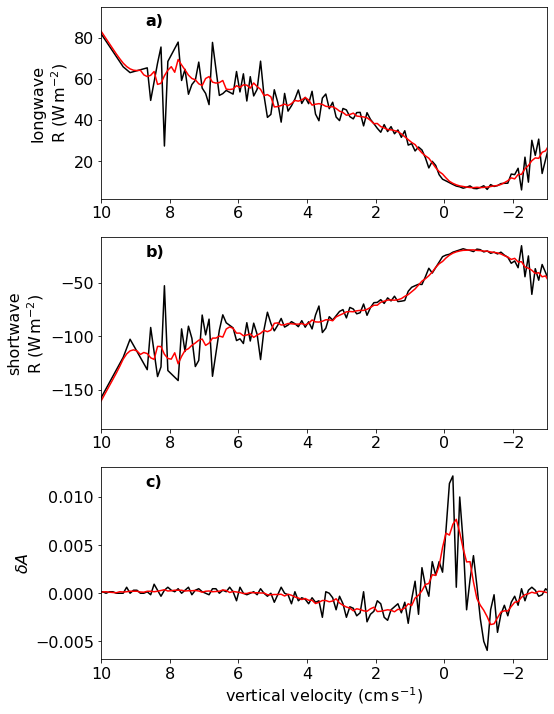

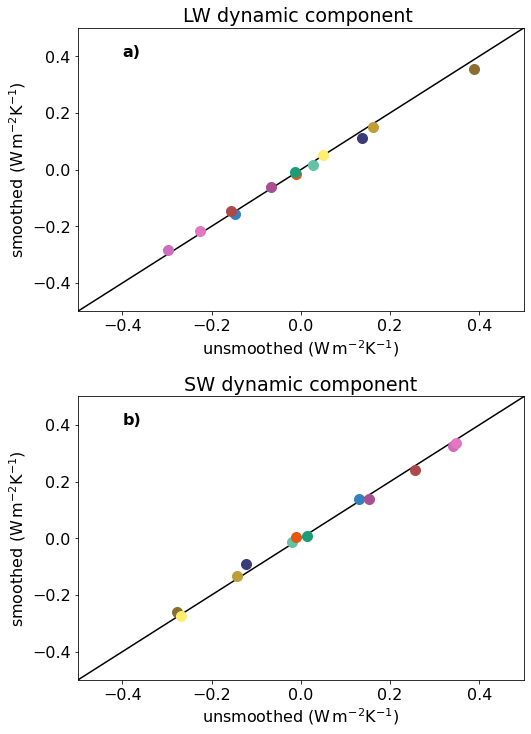

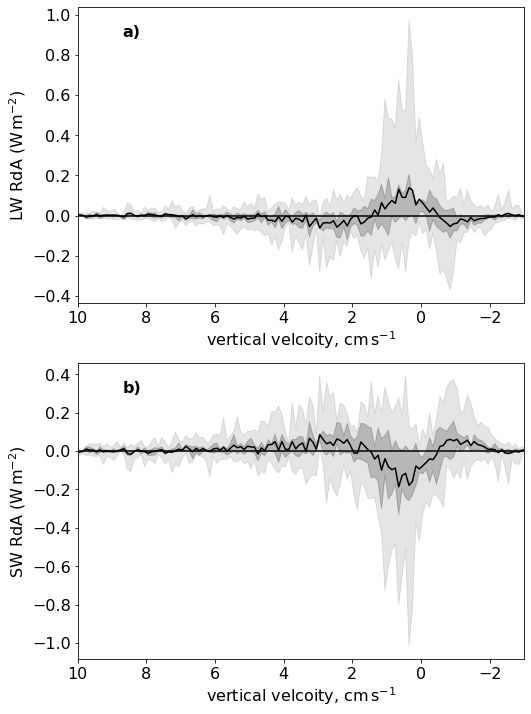

In [20]:
fig, axes = plt.subplots(3,1) # plot to check smoothing
fig1, axes1 = plt.subplots(2,1) # plot of dynamic components in smoothed and unsmoothed versions
fig2, axes2 = plt.subplots(2,1) # R*dA

deltaT = 5
xlim = [10, -3]
cols =  np.load('color_grid.npy', allow_pickle = True)
ms = 10

axes1[0].plot([-1, 2], [-1,2], 'k') 
axes1[1].plot([-1, 2], [-1,2], 'k') 

axes2[0].plot([mnbin[0], mnbin[-1]], [0,0], '-k')
axes2[1].plot([mnbin[0], mnbin[-1]], [0,0], '-k')

LWdiff, SWdiff = np.empty((m)), np.empty((m)) # empty arrays for the smoothed/unsmoothed difference
LW_RdA_array, SW_RdA_array = np.empty((m,b-1)), np.empty((m,b-1))
for k in range(m):
    LW1 = LW_arr[k,]
    SW1 = SW_arr[k,]
    dA = dA_arr[k,]
    
    #plot RdA
    
    LW_RdA_array[k,] = LW1*dA
    SW_RdA_array[k,] = SW1*dA
    
    #axes2[0].plot(mnbin, LW1*dA, '-k')
    #axes2[1].plot(mnbin, SW1*dA, '-k')
        
    # calculate dynamic component for smoothed and unsmoothed R 
    
    # unsmoothed
    dynLW =np.nansum(LW1*dA)/deltaT
    dynSW = np.nansum(SW1*dA)/deltaT
    

    # smooth using running mean
    n = 6
    nh = int(n/2)
    LW1_sm = funcs.running_mean(LW1[~np.isnan(LW1)], n)
    SW1_sm = funcs.running_mean(SW1[~np.isnan(SW1)], n)
    dA_sm = funcs.running_mean(dA[~np.isnan(LW1)], n)

    # calculate dynamic component
    dynLW_sm =np.nansum(LW1_sm*dA_sm)/deltaT
    dynSW_sm = np.nansum(SW1_sm*dA_sm)/deltaT
    
    LWdiff[k] = dynLW_sm - dynLW
    SWdiff[k] = dynSW_sm - dynSW

    mnbin_sm = mnbin[~np.isnan(LW1)][nh-1:-nh] # this is for plotting the smoothed functions on the same plot, to check the smoothing

    # for SAM_CRM
    if k==5:
        axes[0].plot(mnbin, LW1, 'k-')
        axes[0].plot(mnbin_sm, LW1_sm, 'r-')

        axes[1].plot(mnbin, SW1, 'k-')
        axes[1].plot(mnbin_sm, SW1_sm, 'r-')

        axes[2].plot(mnbin, dA, 'k-')
        axes[2].plot(mnbin_sm, dA_sm, 'r-')
    
    axes1[0].plot(dynLW, dynLW_sm, 'o', ms = ms, color = cols[k])
    
    axes1[1].plot(dynSW, dynSW_sm, 'o', ms = ms, color = cols[k])


plt.setp(axes, xlim = xlim)
axes[0].set_ylabel('longwave\nR (W$\,$m$^{-2}$)')
axes[1].set_ylabel('shortwave\nR (W$\,$m$^{-2}$)')
axes[2].set_ylabel('$\delta A$')
axes[2].set_xlabel('vertical velocity (cm$\,$s$^{-1}$)')
axes[0].text(0.1, 0.9, lets[0], fontweight = 'bold',transform=axes[0].transAxes)
axes[1].text(0.1, 0.9, lets[1], fontweight = 'bold',transform=axes[1].transAxes)
axes[2].text(0.1, 0.9, lets[2], fontweight = 'bold',transform=axes[2].transAxes)

fig.set_size_inches(8,12)
fig.savefig('paperplots/smoothed_functions.png', bbox_inches = 'tight')

plt.setp(axes1, xlabel = 'unsmoothed (W$\,$m$^{-2}$K$^{-1}$)', ylabel = 'smoothed (W$\,$m$^{-2}$K$^{-1}$)')
axes1[0].set_ylim([-0.5, 0.5])
axes1[0].set_xlim([-0.5,0.5])
#axes1[0].set_yticks(np.arange(-0.5, 2, 0.5))
#axes1[0].set_xticks(np.arange(-0.5, 2, 0.5))
axes1[0].set_title('LW dynamic component ')
axes1[0].text(0.1, 0.9, lets[0], fontweight = 'bold',transform=axes1[0].transAxes)

axes1[1].set_ylim([-0.5, 0.5])
axes1[1].set_xlim([-0.5,0.5])
axes1[1].set_title('SW dynamic component')
axes1[1].text(0.1, 0.9, lets[1], fontweight = 'bold',transform=axes1[1].transAxes)

fig1.subplots_adjust(hspace = 0.3)
fig1.set_size_inches(8,12)
fig1.savefig('paperplots/smoothed_scatter.png', bbox_inches = 'tight')

axes2[0].plot(mnbin, np.nanmean(LW_RdA_array, axis = 0), color = 'k')
q75, q25 = calcIQR(LW_RdA_array, axis = 0)
axes2[0].fill_between(mnbin, q75, q25, color = 'k', alpha = 0.2)
mn,mx = calcRange(LW_RdA_array, axis = 0)
axes2[0].fill_between(mnbin, mn, mx, color = 'k', alpha = 0.1)
axes2[0].set_ylabel('LW RdA (W$\,$m$^{-2}$)')
axes2[0].text(0.1, 0.9, lets[0], fontweight = 'bold',transform=axes2[0].transAxes)


axes2[1].plot(mnbin, np.nanmean(SW_RdA_array, axis = 0), color = 'k')
q75, q25 = calcIQR(SW_RdA_array, axis = 0)
axes2[1].fill_between(mnbin, q75, q25, color = 'k', alpha = 0.2)
mn,mx = calcRange(SW_RdA_array, axis = 0)
axes2[1].fill_between(mnbin, mn, mx, color = 'k', alpha = 0.1)
axes2[1].set_ylabel('SW RdA (W$\,$m$^{-2}$)')
axes2[1].text(0.1, 0.9, lets[1], fontweight = 'bold',transform=axes2[1].transAxes)

fig2.set_size_inches(8,12)
plt.setp(axes2, xlim = xlim, xlabel = 'vertical velcoity, cm$\,$s$^{-1}$')

# Another reviewer comment, is ascent fraction change due to changes in weak or strong ascent?
Look at dA plots


-0.008016038684258112 0.04536195250218896
[ -2.376       -2.84615385  -4.36893204  -2.7704918    0.95357474
  -5.53968254  -2.65217391 -10.97222222  -3.27777778  -2.328125
  -2.64285714 -17.6       ]
-4.701736795672152


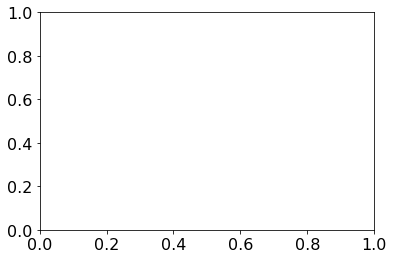

In [18]:
#print out cumulative sum over vertical velocity ranges of dA
cut_off = 2 # cm/s
zero = 0
v = np.argmin(abs(mnbin - cut_off))

zero = np.argmin(abs(mnbin - zero))

strong, weak = [],[]
for model_number in range(12):
    #print('strong:', np.nansum(dA_arr[model_number,v:]))
    strong = np.append(strong, np.nansum(dA_arr[model_number,v:]))
    #print('weak:', np.nansum(dA_arr[model_number, zero:v]))
    weak = np.append(weak,  np.nansum(dA_arr[model_number, zero:v]))

print(np.mean(strong), np.mean(weak))
print(weak/strong)
print(np.mean(weak/strong))

# Single model plot - not used in paper

Example of R(w) and A(w) functions using SAM_CRM. Now included in Figure 2

/home/users/arm33/RCEMIP/allMod/../funcs.py:128: RuntimeWarning: Mean of empty slice
  arrbin = [np.nanmean(arr[dig==i]) for i in range(1,b)]


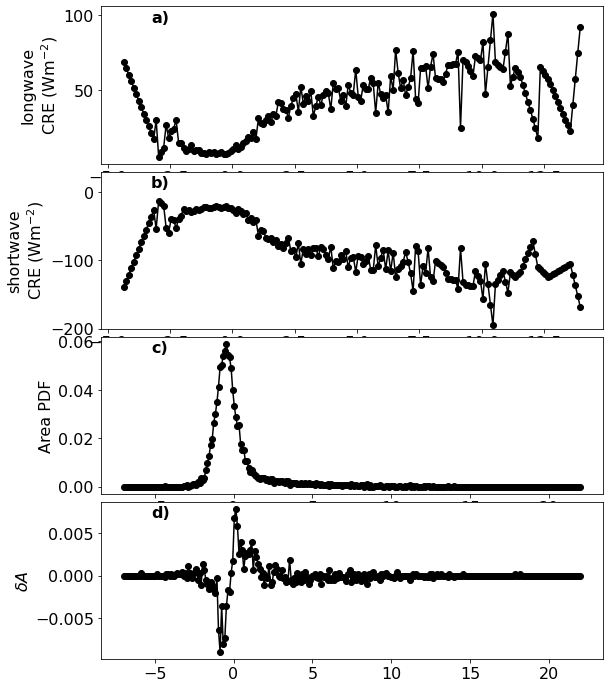

In [22]:
temp = 'large300'
temp2 = 'large305'

col = 'black'
fig, axes = plt.subplots(4,1)

model = 'SAM_CRM'
dp = '/home/users/arm33/RCEMIP/'+ model +'/processed/DirectFeedbacks/3D/'
dp3 = '/home/users/arm33/RCEMIP/'+ model +'/processed/'
xlim = [0.1, -0.03]
ylimLw = [-5,105]
ylimSw = [-190, 0]
ylimA = [0,0.2]

#SAM-CRM
#temp1
pa = np.load(dp + temp + 'pa_profile_25d.npy', allow_pickle = True)/100
wa = np.load(dp + temp + 'wa_profile_25d.npy', allow_pickle = True)
wa500 = funcs.getPlevel(wa, pa, pLev)             

lwcrf1 = np.load(dp3 + '/DirectFeedbacks/full/' + temp + 'lwcrf24hrs.npy', allow_pickle = True)
swcrf1 =  np.load(dp3 + '/DirectFeedbacks/full/' + temp + 'swcrf24hrs.npy', allow_pickle = True)

dig1 = np.digitize(wa500, bins)
A1 = funcs.createA(dig1, b)
LW1 = funcs.createR(lwcrf1, dig1, b)
LW1 = funcs.rpTrailingZeros(A1, LW1)
SW1 = funcs.createR(swcrf1, dig1, b)
SW1 = funcs.rpTrailingZeros(A1, SW1)

#temp2
pa = np.load(dp + temp2 + 'pa_profile_25d.npy', allow_pickle = True)/100
wa = np.load(dp + temp2 + 'wa_profile_25d.npy', allow_pickle = True)
wa500 = funcs.getPlevel(wa, pa, pLev)             

dig1 = np.digitize(wa500, bins)
A2 = funcs.createA(dig1, b)
dA = A2 - A1

axes[0].plot(mnbin, LW1, 'o-', color = col)
axes[0].set_ylabel('longwave\nCRE (Wm$^{-2}$)')
axes[0].text(0.1, 0.9, lets[0], fontweight = 'bold',transform=axes[0].transAxes)

axes[1].plot(mnbin, SW1, 'o-', color = col)
axes[1].set_ylabel('shortwave\nCRE (Wm$^{-2}$)')
axes[1].text(0.1, 0.9, lets[1], fontweight = 'bold',transform=axes[1].transAxes)
axes[1].set_ylim([-200, 30 ])

axes[2].plot(mnbin, A1, 'o-', color = col)
axes[2].set_ylabel('Area PDF')
axes[2].text(0.1, 0.9, lets[2], fontweight = 'bold',transform=axes[2].transAxes)
   
axes[3].plot(mnbin, dA, 'o-', color = col)
axes[3].set_ylabel('$\delta A$')
axes[3].text(0.1, 0.9, lets[3], fontweight = 'bold',transform=axes[3].transAxes)

#plt.setp(axes[3],xlim =xlim, xlabel = 'vertical velocity (ms$^{-1}$)')
#plt.setp(axes[:3], xlim = xlim, xticklabels = [])
plt.subplots_adjust(hspace = 0.05)
fig.set_size_inches(9,12)
fig.savefig('goodplots/example_functions_just_SAM.png', bbox_inches = 'tight')

